#### Importing libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import f1_score
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron
from sklearn.neighbors import NearestCentroid
from sklearn.gaussian_process import GaussianProcessClassifier
from xgboost import XGBClassifier
from lazypredict.Supervised import LazyClassifier
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

#### Load data and display first few rows of data

In [2]:
db = pd.read_csv("TCGA_InfoWithGrade.csv")
db.head()

,Grade,Gender,Age_at_diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,0,0,51.30,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,38.72,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,35.17,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,32.78,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,31.51,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Display count of each class in the target variable

In [3]:
db["Grade"].value_counts()

Grade
0    487
1    352
Name: count, dtype: int64

#### Display data types of columns

In [4]:
db.dtypes

Grade                 int64
Gender                int64
Age_at_diagnosis    float64
Race                  int64
IDH1                  int64
TP53                  int64
ATRX                  int64
PTEN                  int64
EGFR                  int64
CIC                   int64
MUC16                 int64
PIK3CA                int64
NF1                   int64
PIK3R1                int64
FUBP1                 int64
RB1                   int64
NOTCH1                int64
BCOR                  int64
CSMD3                 int64
SMARCA4               int64
GRIN2A                int64
IDH2                  int64
FAT4                  int64
PDGFRA                int64
dtype: object

#### Convert 'Age_at_diagnosis' to integer type

In [5]:
db['Age_at_diagnosis'] = db['Age_at_diagnosis'].astype('int')
db.dtypes

Grade               int64
Gender              int64
Age_at_diagnosis    int32
Race                int64
IDH1                int64
TP53                int64
ATRX                int64
PTEN                int64
EGFR                int64
CIC                 int64
MUC16               int64
PIK3CA              int64
NF1                 int64
PIK3R1              int64
FUBP1               int64
RB1                 int64
NOTCH1              int64
BCOR                int64
CSMD3               int64
SMARCA4             int64
GRIN2A              int64
IDH2                int64
FAT4                int64
PDGFRA              int64
dtype: object

#### Preprocess data: Standardize features

In [6]:
X = db.drop(columns=['Grade']).values
y = db['Grade'].values
X = preprocessing.StandardScaler().fit(X).transform(X)

#### Split data into train and test sets

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print('Train set:', X_train.shape,  y_train.shape)
print('Test set:', X_test.shape,  y_test.shape)

Train set: (671, 23) (671,)
Test set: (168, 23) (168,)


#### Visualize correlation heatmap of all features

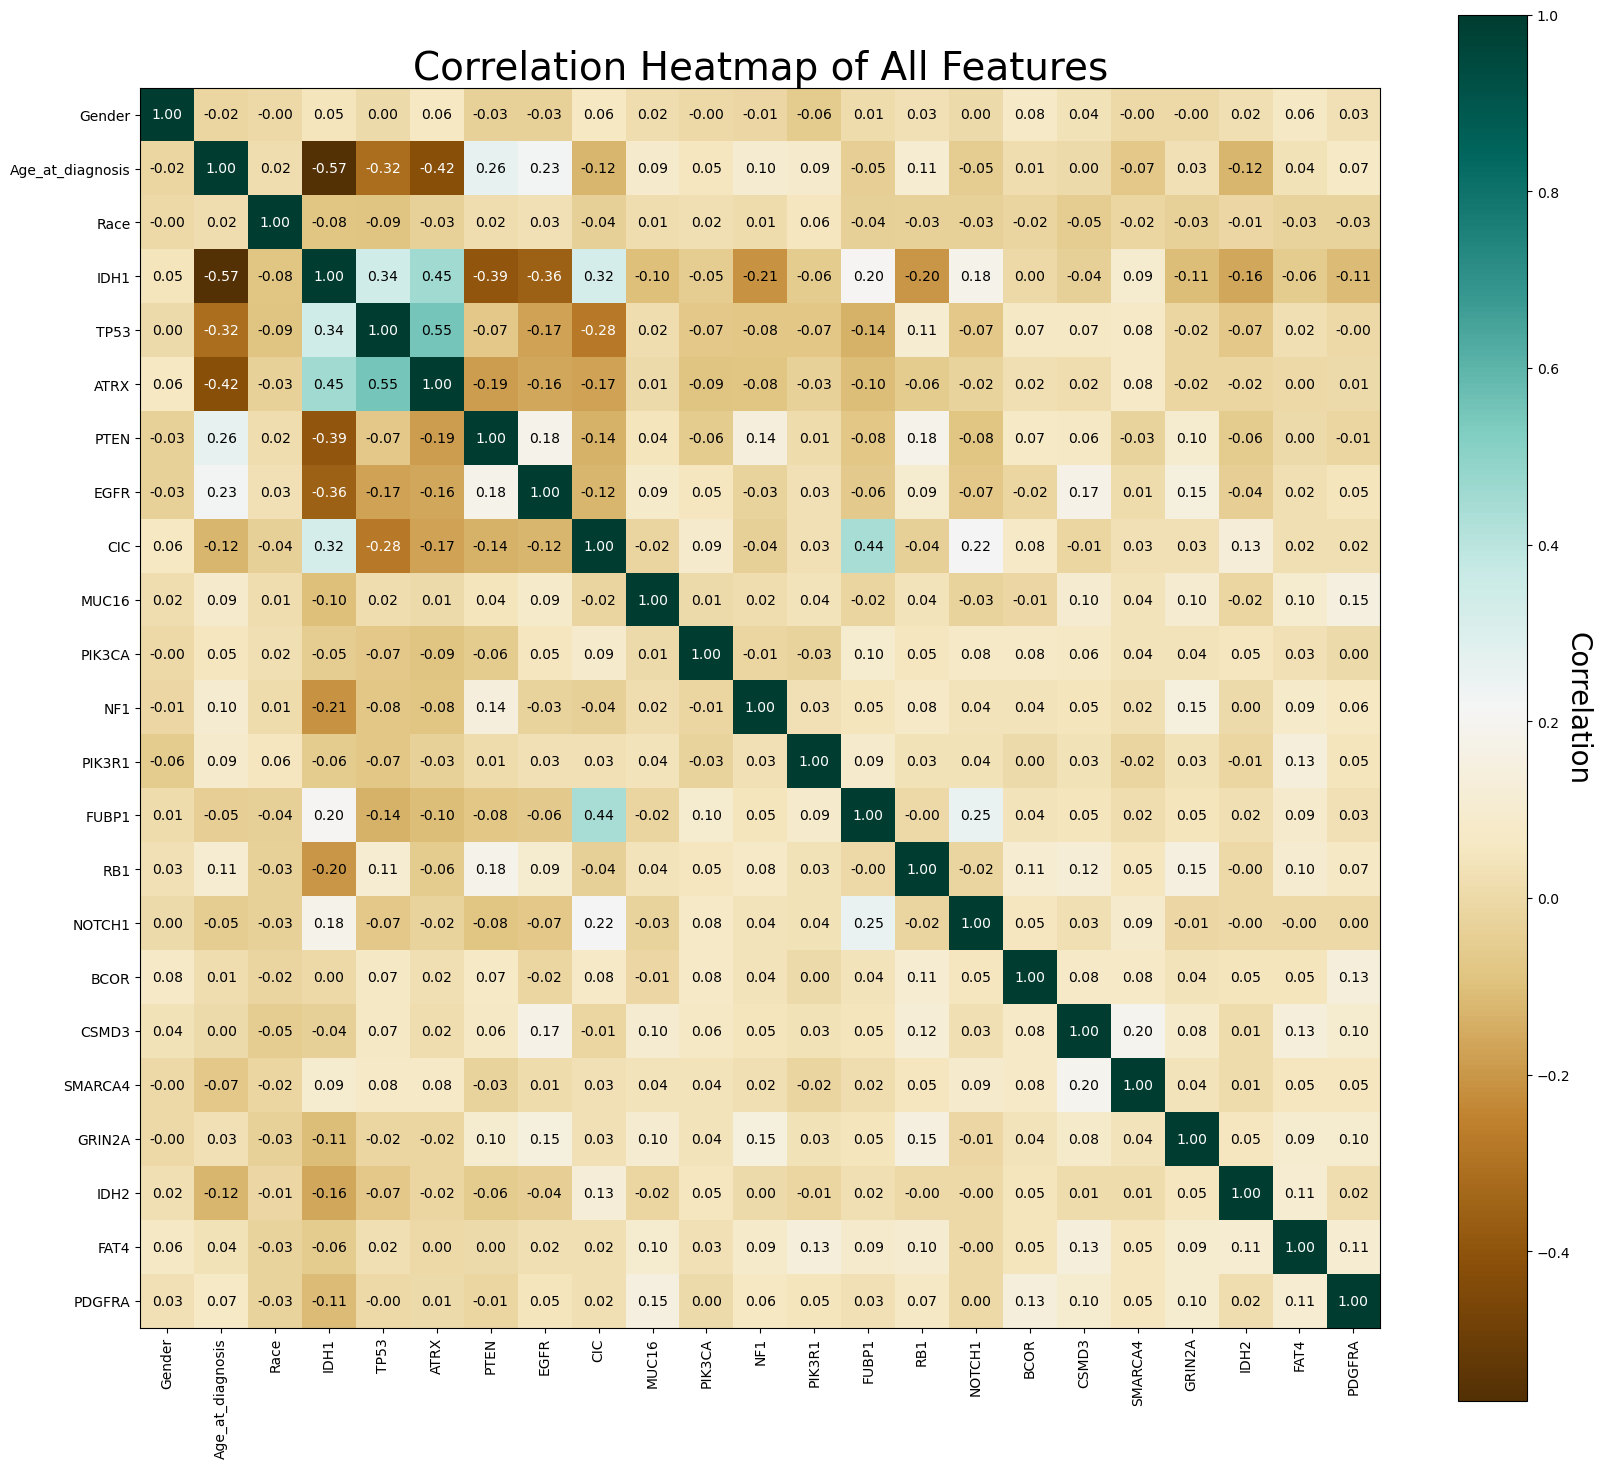

In [8]:
fig, ax = plt.subplots(figsize=(20, 18))
correlation_matrix_all = db.drop(columns=['Grade']).corr()
heatmap = ax.imshow(correlation_matrix_all, interpolation='nearest', cmap='BrBG')
cbar = plt.colorbar(heatmap, ax=ax)
cbar.set_label('Correlation', rotation=270, labelpad=15, fontdict={'fontsize': 20})

for i in range(len(correlation_matrix_all)):
    for j in range(len(correlation_matrix_all)):
        cell_value = correlation_matrix_all.iloc[i, j]
        text_color = 'black' if ((correlation_matrix_all.min().min())+0.35) <= cell_value <= ((correlation_matrix_all.max().max())-0.35) else 'white'
        text = ax.text(j, i, f'{cell_value:.2f}',
                       ha="center", va="center", color=text_color)

ax.set_xticks(range(len(correlation_matrix_all.columns)))
ax.set_yticks(range(len(correlation_matrix_all.index)))
ax.set_xticklabels(correlation_matrix_all.columns, rotation=90)
ax.set_yticklabels(correlation_matrix_all.index)
ax.set_title('Correlation Heatmap of All Features', fontdict={'fontsize': 28})

plt.show()


#### LazyPredict to quickly evaluate multiple models

In [9]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None,
                     predictions=True, classifiers=[RandomForestClassifier, GradientBoostingClassifier,
                                                    LogisticRegression, SGDClassifier, Perceptron,
                                                    NearestCentroid, LinearSVC, GaussianProcessClassifier,
                                                    XGBClassifier])
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

100%|██████████| 9/9 [00:01<00:00,  6.44it/s]

                            Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                        
LinearSVC                       0.90               0.90     0.90      0.90   
NearestCentroid                 0.89               0.89     0.89      0.89   
LogisticRegression              0.89               0.89     0.89      0.89   
GradientBoostingClassifier      0.88               0.88     0.88      0.88   
Perceptron                      0.86               0.85     0.85      0.86   
GaussianProcessClassifier       0.85               0.85     0.85      0.85   
RandomForestClassifier          0.84               0.82     0.82      0.84   
XGBClassifier                   0.83               0.81     0.81      0.82   
SGDClassifier                   0.80               0.80     0.80      0.80   

                            Time Taken  
Model                                   
LinearSVC                         0.05  
NearestCentroid   

#### Train LinearSVC model

In [10]:
model = LinearSVC(max_iter=6000)
model.fit(X_train, y_train)

LinearSVC(max_iter=6000)

#### Evaluate model using F1 score

In [11]:
y_pred = model.predict(X_test)
print("F1 score without feature selection:", f1_score(y_test, y_pred, average='weighted'))

F1 score without feature selection: 0.898725487667535


#### Feature selection with LinearSVC

In [12]:
sfm = SelectFromModel(model)
sfm.fit(X_train, y_train)
X_train_selected = sfm.transform(X_train)
X_test_selected = sfm.transform(X_test)

#### Display selected features

In [13]:
selected_features = db.drop(columns=['Grade']).columns[sfm.get_support()]
print("Selected features:", selected_features)

Selected features: Index(['Age_at_diagnosis', 'IDH1', 'TP53', 'NOTCH1', 'IDH2'], dtype='object')


#### Train LinearSVC model with selected features

In [14]:
model_selected = LinearSVC(max_iter=6000)
model_selected.fit(X_train_selected, y_train)

LinearSVC(max_iter=6000)

#### Evaluate model with selected features using F1 score and confusion matrix

In [15]:
y_pred_selected = model_selected.predict(X_test_selected)
print("F1 score with feature selection:",f1_score(y_test, y_pred_selected, average='weighted'))

F1 score with feature selection: 0.9048988197924369


              precision    recall  f1-score   support

           0       0.92      0.91      0.91        95
           1       0.88      0.90      0.89        73

    accuracy                           0.90       168
   macro avg       0.90      0.90      0.90       168
weighted avg       0.91      0.90      0.90       168



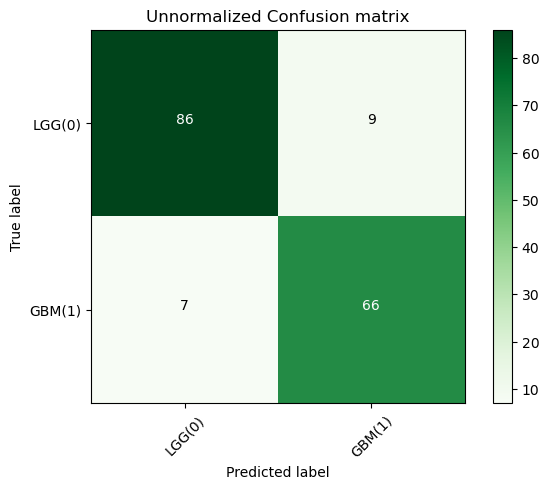

In [16]:
def plot_confusion_matrix(confusion_matrix, classes, normalize=False,
                          title='Confusion matrix', cmap=plt.cm.Greens):
    if normalize:
        confusion_matrix = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]
        title = 'Normalized ' + title
    else:
        title = 'Unnormalized ' + title

    plt.imshow(confusion_matrix, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.xticks(np.arange(len(classes)), classes, rotation=45)
    plt.yticks(np.arange(len(classes)), classes)

    fmt = '.2f' if normalize else 'd'
    thresh = confusion_matrix.max() / 2.
    for i, j in itertools.product(range(len(classes)), range(len(classes))):
        plt.text(j, i, format(confusion_matrix[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if confusion_matrix[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_selected, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_pred_selected))

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['LGG(0)','GBM(1)'], normalize=False, title='Confusion matrix')


#### Plot feature importances

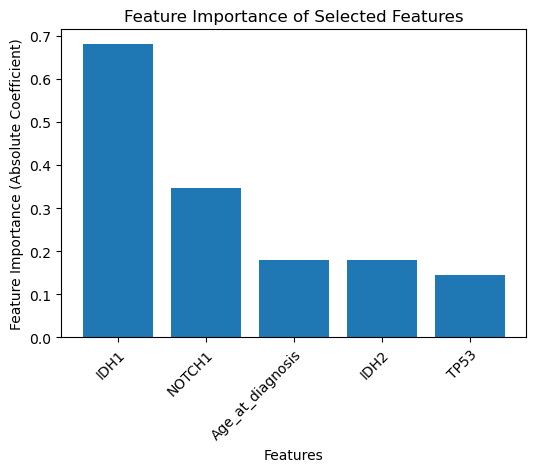

In [17]:
feature_importances = np.abs(model_selected.coef_[0])
selected_indices = sfm.get_support(indices=True)
selected_feature_names = db.drop(columns=['Grade']).columns[selected_indices]
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = selected_feature_names[sorted_indices]

plt.figure(figsize=(6, 4))
plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances, align='center')
plt.xticks(range(len(sorted_feature_importances)), sorted_feature_names, rotation=45, rotation_mode='anchor', ha='right')
plt.xlabel('Features')
plt.ylabel('Feature Importance (Absolute Coefficient)')
plt.title('Feature Importance of Selected Features')
plt.show()